# Order dependency

Experiments performed for the thesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

import leader_implementation as lead

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
    
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

varinfo = heart_disease.variables

varinfo.loc[varinfo['name'] == 'sex', 'type'] = 'Categorical'
varinfo

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


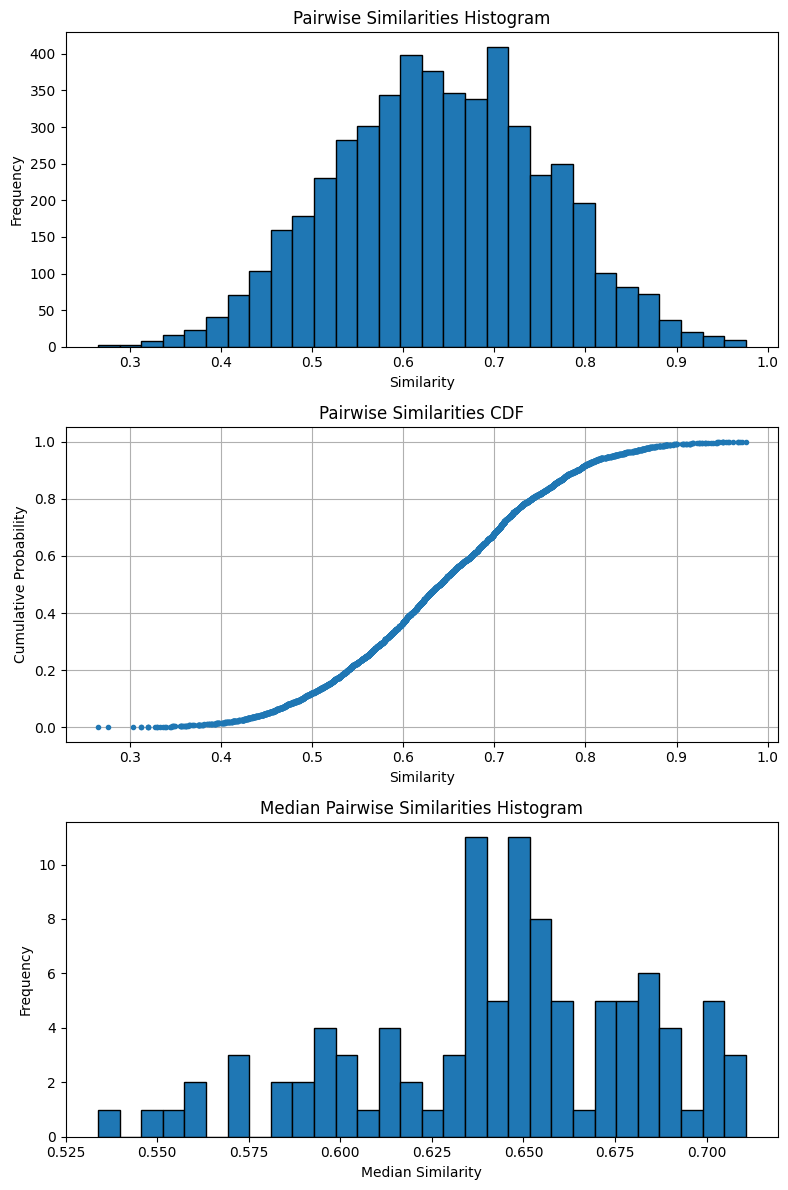

Mean similarity: 0.64
Quartiles: [0.56  0.64  0.72]


In [3]:
leader = lead.LeaderAlgorithms(X, varinfo, similarity_func='gower', seed=42)

In [4]:
s_min = 0.6

### Leader

In [5]:
dataframe = []
new_X = X
for i in range(100):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

df_leader = pd.DataFrame(dataframe)
df_leader

,Clusters,Leaders,Avg_similarities,Sizes
0,6,"[225, 152, 228, 126, 71, 0]","[0.7392376561395739, 0.6881143004635619, 0.751...","[172, 53, 63, 5, 8, 2]"
1,5,"[204, 193, 154, 189, 167]","[0.7274256229998233, 0.6657061275626522, 0.704...","[237, 37, 20, 8, 1]"
2,6,"[99, 296, 257, 126, 127, 186]","[0.732608606892385, 0.6797215864110953, 0.6853...","[249, 26, 14, 7, 6, 1]"
3,5,"[245, 161, 14, 121, 61]","[0.6988528511958992, 0.6991719178358693, 0.717...","[249, 27, 16, 8, 3]"
4,5,"[113, 249, 162, 123, 1]","[0.6864815642825148, 0.7138425387125238, 0.781...","[108, 146, 34, 12, 3]"
...,...,...,...,...
95,6,"[0, 127, 53, 193, 126, 152]","[0.6612173350922574, 0.7517292451876431, 0.766...","[76, 135, 86, 3, 2, 1]"
96,5,"[67, 42, 181, 292, 196]","[0.7163678028926767, 0.7425021276985735, 0.737...","[234, 26, 38, 3, 2]"
97,7,"[101, 193, 250, 83, 91, 167, 203]","[0.716130881001898, 0.6772967014948384, 0.7659...","[209, 45, 38, 8, 1, 1, 1]"
98,4,"[111, 287, 253, 285]","[0.6945090497876181, 0.7230772888321984, 0.853...","[183, 98, 20, 2]"


Throughout the 10 executions there have been obtained different number of clusters 5 times
The different executions have found 203 different leaders out of 549 possible (36.98%)


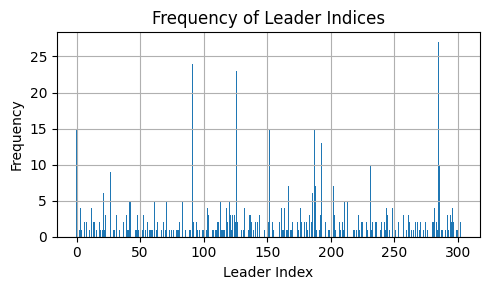

In [6]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader['Clusters'].nunique()} times")

total_leaders = set()

leader_indices = np.zeros(len(X), dtype=np.int16)

for i, row in df_leader.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)
        leader_indices[l] += 1

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader['Clusters']) *100:.2f}%)")

# Plotting bar plot for leader_indices
plt.figure(figsize=(5, 3))
plt.bar(np.arange(len(leader_indices)), leader_indices, alpha=1)
plt.xlabel('Leader Index')
plt.ylabel('Frequency')
plt.title('Frequency of Leader Indices')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
for i in range(len(leader_indices)):
    if leader_indices[i] == max(leader_indices):
        print(i, leader_indices[i])

285 27


### Leadaer2

In [8]:
dataframe = []
new_X = X
for i in range(100):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader2(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

df_leader2 = pd.DataFrame(dataframe)
df_leader2

,Clusters,Leaders,Avg_similarities,Sizes
0,6,"[225, 152, 228, 126, 71, 0]","[0.7788617778583374, 0.7508026251768926, 0.765...","[109, 31, 91, 10, 49, 13]"
1,5,"[204, 193, 154, 189, 167]","[0.7724860428620203, 0.7169020522559968, 0.752...","[133, 26, 52, 57, 35]"
2,6,"[99, 296, 257, 126, 127, 186]","[0.7796786587493014, 0.7004745104954532, 0.756...","[127, 18, 42, 14, 86, 16]"
3,5,"[245, 161, 14, 121, 61]","[0.7333486622062886, 0.7404888280645021, 0.751...","[109, 55, 65, 33, 41]"
4,5,"[113, 249, 162, 123, 1]","[0.7230821494248894, 0.7542814597349641, 0.780...","[25, 75, 112, 50, 41]"
...,...,...,...,...
95,6,"[0, 127, 53, 193, 126, 152]","[0.6943925882163278, 0.7903741755003318, 0.783...","[17, 100, 127, 14, 11, 34]"
96,5,"[67, 42, 181, 292, 196]","[0.7717082645925026, 0.7687638818539907, 0.774...","[111, 69, 61, 33, 29]"
97,7,"[101, 193, 250, 83, 91, 167, 203]","[0.756725522472244, 0.6903274755579799, 0.7769...","[90, 16, 73, 25, 12, 18, 69]"
98,4,"[111, 287, 253, 285]","[0.7565457141065101, 0.7677054571330586, 0.799...","[72, 107, 118, 6]"


Throughout the 10 executions there have been obtained different number of clusters 5 times
The different executions have found 203 different leaders out of 549 possible (36.98%)


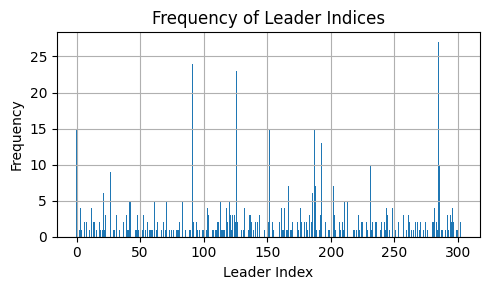

In [9]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader2['Clusters'].nunique()} times")

total_leaders = set()

leader_indices = np.zeros(len(X), dtype=np.int16)

for i, row in df_leader2.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)
        leader_indices[l] += 1

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader2['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader2['Clusters']) *100:.2f}%)")
# Plotting bar plot for leader_indices
plt.figure(figsize=(5, 3))
plt.bar(np.arange(len(leader_indices)), leader_indices, alpha=1)
plt.xlabel('Leader Index')
plt.ylabel('Frequency')
plt.title('Frequency of Leader Indices')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
for i in range(len(leader_indices)):
    if leader_indices[i] == max(leader_indices):
        print(i, leader_indices[i])

285 27


### Leader-Medoid

In [11]:
dataframe = []
new_X = X
for i in range(100):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader_Medoid(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

    # print(i)

df_leader_med = pd.DataFrame(dataframe)
df_leader_med

,Clusters,Leaders,Avg_similarities,Sizes
0,5,"[190, 8, 247, 192, 193]","[0.8030667090948101, 0.7820734971719004, 0.799...","[131, 106, 55, 10, 1]"
1,6,"[219, 279, 38, 285, 190, 68]","[0.7763466019818185, 0.7876690437139551, 0.802...","[121, 36, 92, 2, 48, 4]"
2,6,"[190, 76, 250, 279, 261, 124]","[0.8054235943361728, 0.8082861546567832, 0.782...","[137, 93, 31, 30, 6, 6]"
3,6,"[190, 96, 88, 108, 126, 0]","[0.8157518870487965, 0.8017826103009212, 0.807...","[116, 68, 65, 46, 5, 3]"
4,5,"[76, 190, 89, 209, 73]","[0.7957363232858602, 0.8121772109662615, 0.822...","[115, 112, 53, 18, 5]"
...,...,...,...,...
95,5,"[190, 38, 158, 94, 126]","[0.8004692803272595, 0.7933093667744098, 0.794...","[141, 92, 45, 19, 6]"
96,6,"[219, 190, 76, 38, 71, 91]","[0.7993318594452472, 0.8160708915786856, 0.826...","[75, 100, 64, 42, 19, 3]"
97,5,"[128, 25, 76, 97, 285]","[0.818130701840668, 0.7926684562290002, 0.8057...","[106, 71, 104, 21, 1]"
98,5,"[76, 287, 89, 73, 209]","[0.8023214181030324, 0.7797270961652574, 0.799...","[101, 73, 121, 4, 4]"


Throughout the 10 executions there have been obtained different number of clusters 5 times
The different executions have found 105 different leaders out of 508 possible (20.67%)


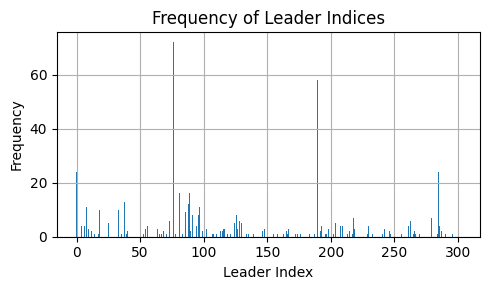

In [12]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader_med['Clusters'].nunique()} times")

total_leaders = set()

leader_indices = np.zeros(len(X), dtype=np.int16)

for i, row in df_leader_med.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)
        leader_indices[l] +=1

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader_med['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader_med['Clusters']) *100:.2f}%)")

# Plotting bar plot for leader_indices
plt.figure(figsize=(5, 3))
plt.bar(np.arange(len(leader_indices)), leader_indices, alpha=1)
plt.xlabel('Leader Index')
plt.ylabel('Frequency')
plt.title('Frequency of Leader Indices')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
for i in range(len(leader_indices)):
    if leader_indices[i] == max(leader_indices):
        print(i, leader_indices[i])

76 72


### Leader2 Medoid

In [14]:
dataframe = []
new_X = X
for i in range(100):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader2_Medoid(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)


df_leader2_med = pd.DataFrame(dataframe)
df_leader2_med

,Clusters,Leaders,Avg_similarities,Sizes
0,5,"[190, 8, 247, 9, 218]","[0.8103942263854366, 0.7849750031473214, 0.804...","[125, 103, 52, 12, 11]"
1,6,"[86, 279, 38, 285, 43, 126]","[0.7889573094491189, 0.797947306462893, 0.8082...","[139, 41, 89, 2, 20, 12]"
2,5,"[190, 76, 250, 230, 124]","[0.8192159733690927, 0.8135199477542603, 0.785...","[121, 87, 34, 49, 12]"
3,6,"[190, 229, 88, 300, 110, 0]","[0.8222848576990607, 0.8241048255583334, 0.800...","[111, 22, 68, 74, 22, 6]"
4,5,"[76, 128, 89, 267, 285]","[0.8049415722559038, 0.8367357069319185, 0.815...","[109, 90, 75, 26, 3]"
...,...,...,...,...
95,6,"[8, 38, 190, 285, 102, 126]","[0.8010061995186587, 0.815558596498085, 0.8171...","[62, 68, 125, 2, 34, 12]"
96,6,"[219, 190, 110, 127, 107, 193]","[0.8136251826722449, 0.8304890195997953, 0.780...","[62, 90, 36, 59, 45, 11]"
97,6,"[128, 18, 76, 124, 97, 285]","[0.8262893204298797, 0.8250307557630999, 0.809...","[95, 55, 101, 29, 20, 3]"
98,5,"[76, 287, 89, 73, 209]","[0.8115803959424325, 0.7873657726267577, 0.803...","[93, 70, 119, 4, 17]"


Throughout the 10 executions there have been obtained different number of clusters 3 times
The different executions have found 105 different leaders out of 507 possible (20.71%)


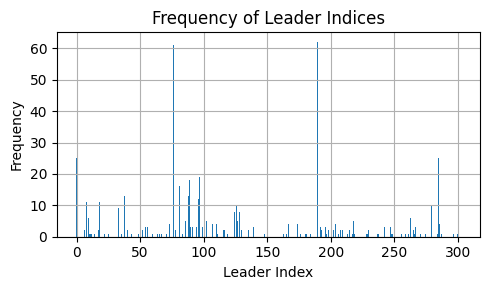

In [15]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader2_med['Clusters'].nunique()} times")

total_leaders = set()

leader_indices = np.zeros(len(X), dtype=np.int16)

for i, row in df_leader2_med.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)
        leader_indices[l] += 1

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader2_med['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader2_med['Clusters']) *100:.2f}%)")

# Plotting bar plot for leader_indices
plt.figure(figsize=(5, 3))
plt.bar(np.arange(len(leader_indices)), leader_indices, alpha=1)
plt.xlabel('Leader Index')
plt.ylabel('Frequency')
plt.title('Frequency of Leader Indices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
for i in range(len(leader_indices)):
    if leader_indices[i] == max(leader_indices):
        print(i, leader_indices[i])

190 62


### Leader3 Medoid

In [17]:
dataframe = []
new_X = X
for i in range(100):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader3_Medoid(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

df_leader3_med = pd.DataFrame(dataframe)
df_leader3_med

,Clusters,Leaders,Avg_similarities,Sizes
0,5,"[26, 66, 76, 204, 285]","[0.8291786921536869, 0.7847701802893385, 0.817...","[86, 58, 90, 67, 2]"
1,6,"[19, 158, 127, 285, 253, 9]","[0.8508020679930827, 0.8179260615454778, 0.823...","[81, 56, 67, 1, 76, 22]"
2,5,"[190, 76, 209, 253, 0]","[0.8270983318275922, 0.808507497284359, 0.8419...","[103, 108, 24, 57, 11]"
3,5,"[190, 300, 88, 76, 285]","[0.8295948800458025, 0.8291208976070935, 0.807...","[103, 47, 74, 76, 3]"
4,5,"[76, 128, 89, 267, 285]","[0.8027012117269229, 0.8471825933377016, 0.817...","[112, 82, 79, 27, 3]"
...,...,...,...,...
95,4,"[296, 76, 85, 129]","[0.8056876885544934, 0.8096988783724045, 0.824...","[13, 108, 88, 94]"
96,6,"[52, 128, 110, 127, 107, 193]","[0.8020807783112933, 0.8345585809498999, 0.789...","[51, 100, 39, 56, 47, 10]"
97,5,"[128, 18, 76, 124, 91]","[0.8424824074252752, 0.8175594674908016, 0.797...","[81, 71, 117, 23, 11]"
98,5,"[76, 287, 89, 73, 209]","[0.8204573637277157, 0.7939832798940053, 0.811...","[84, 62, 102, 25, 30]"


Throughout the 10 executions there have been obtained different number of clusters 4 times
The different executions have found 127 different leaders out of 513 possible (24.76%)


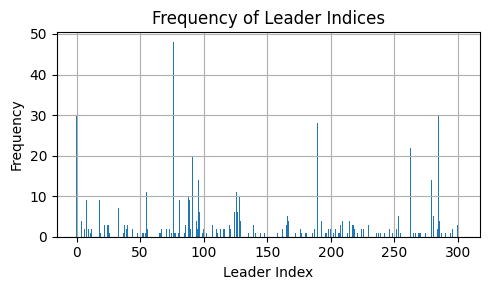

In [18]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader3_med['Clusters'].nunique()} times")

total_leaders = set()

leader_indices = np.zeros(len(X), dtype=np.int16)

for i, row in df_leader3_med.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)
        leader_indices[l] += 1

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader3_med['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader3_med['Clusters']) *100:.2f}%)")

# Plotting bar plot for leader_indices
plt.figure(figsize=(5, 3))
plt.bar(np.arange(len(leader_indices)), leader_indices, alpha=1)
plt.xlabel('Leader Index')
plt.ylabel('Frequency')
plt.title('Frequency of Leader Indices')
plt.grid(True)
plt.tight_layout()
plt.show()



In [19]:
for i in range(len(leader_indices)):
    if leader_indices[i] == max(leader_indices):
        print(i, leader_indices[i])

76 48
